In this notebook, we just look at avaialble variables in different nc files. We perform basic operations like readind ensemble data, means, plotting. For formal analysis, see other notebooks.

In [1]:
# Load libraries

import numpy as np
import xarray as xr
import cartopy
import matplotlib.pyplot as plt

# !pip list

## Global Means

Working with zonally integrated and volume integrated fields, which include global mean T, S, overturning circulaton and meridional heat transport profiles in the North Atlantic.  

1. Heat and salt transport diagnostics for eddy parameterizations are not available. The data has `nan` values.
2. Total Meridional Heat/Salt Transport = Advective Heat/Salt Transport + Diffusive Heat/Salt Transport
3. Total Meridional Heat/Salt Transport = Heat/Salt Transport due to Overturning + Heat/Salt Transport due to Gyres
4. Variability across ensemles is low. 
5. The seaonal variability is seen in overturning strength (and possibly also in heat and salt transport magnitudes)

#### Note 
Divide `sopstadv_atlantic` and `sltovbaro_atlantic` by 1000 to get correct units.

In [3]:
# Code for combining data

"""
ppdir="/home/users/hkhatri/DePreSys4_Data/Ensemble_Data/2008-az256/"

ds = []

for i in range(0,10):
    
    d = xr.open_mfdataset(ppdir + "r" + str(i+1) + "/onm/*.nc")
    ds.append(d)
    
ds = xr.concat(ds, dim='r')

ds['time'] = ds['time_centered'].astype("datetime64[ns]") # convert cftime to convenient form

save_path="/home/users/hkhatri/DePreSys4_Data/Ensemble_Data/Data_Consolidated/"
save_file = save_path + "2008_diaptr.nc"
ds_save = ds.load()
ds_save.to_netcdf(save_file)

"""

In [4]:
# Read ensemble data for run started in year 2008

ppdir="/home/users/hkhatri/DePreSys4_Data/Ensemble_Data/Data_Consolidated/"
ds = xr.open_dataset(ppdir + "2008_diaptr.nc") 

print(ds)

<xarray.Dataset>
Dimensions:                  (axis_nbounds: 2, deptht: 75, depthw: 75, r: 10, time_counter: 125, x: 1, y: 451)
Coordinates:
  * deptht                   (deptht) float32 0.50576 1.5558553 ... 5902.0576
  * depthw                   (depthw) float32 0.0 1.0239066 ... 5596.249 5800.0
    nav_lat                  (y, x) float32 ...
    nav_lon                  (y, x) float32 ...
    time_centered            (time_counter) object ...
  * time_counter             (time_counter) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
Dimensions without coordinates: axis_nbounds, r, x, y
Data variables:
    deptht_bounds            (r, time_counter, deptht, axis_nbounds) float32 ...
    depthw_bounds            (r, time_counter, depthw, axis_nbounds) float32 ...
    hfbasin_atlantic         (r, time_counter, y, x) float32 ...
    hfbasinpadv_atlantic     (r, time_counter, y, x) float32 ...
    hfbasinpmadv_atlantic    (r, time_counter, y, x) float32 ...
    hfbasinpmdiff_atlantic   (r, time_count

(array([733042., 733773., 734503., 735234., 735964., 736695., 737425.]),
 <a list of 7 Text xticklabel objects>)

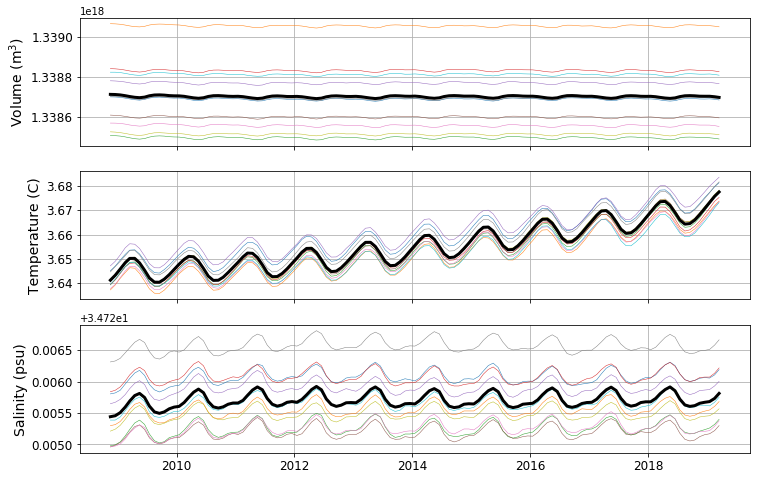

In [5]:
# Global mean temperature, salinity and total ocean volume time series for ensemble runs and their mean.

grid = plt.GridSpec(3, 1, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[12,8])

ax = fig.add_subplot(grid[0, 0])
ax.plot(ds.time, ds.scvoltot.transpose('time_counter', 'r'), lw = 0.5)
ax.plot(ds.time, ds.scvoltot.mean('r'), lw = 3, color='k')
ax.set_ylabel(r'Volume (m$^3$)', fontsize=14)
ax.set_xticklabels([])
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[1, 0])
ax.plot(ds.time, ds.thetaoga.transpose('time_counter', 'r'), lw = 0.5)
ax.plot(ds.time, ds.thetaoga.mean('r'), lw = 3, color='k')
ax.set_ylabel(r'Temperature (C)', fontsize=14)
ax.set_xticklabels([])
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[2, 0])
ax.plot(ds.time, ds.soga.transpose('time_counter', 'r'), lw = 0.5)
ax.plot(ds.time, ds.soga.mean('r'), lw = 3, color='k')
ax.set_ylabel(r'Salinity (psu)', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

/opt/jaspy/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


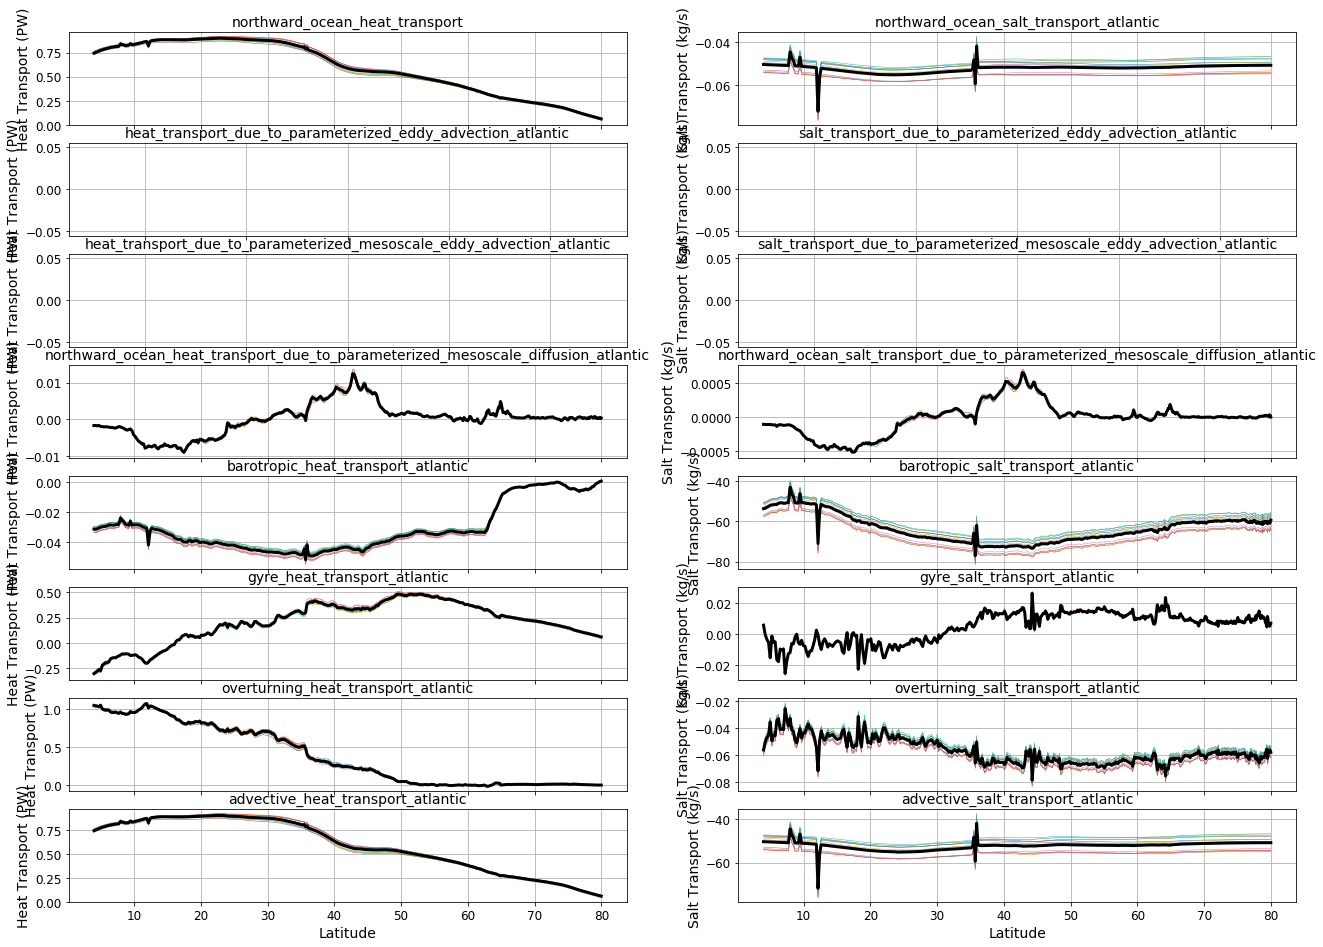

In [6]:
# Meridional heat transport and salt transport (titles should be for salt transport on right panels)

var_heat = ['hfbasin_atlantic', 'hfbasinpadv_atlantic', 'hfbasinpmadv_atlantic', 'hfbasinpmdiff_atlantic',
            'hfovbaro_atlantic', 'hfovgyre_atlantic', 'hfovovrt_atlantic', 'sophtadv_atlantic']

var_salt = ['sltbasin_atlantic', 'sltbasinpadv_atlantic', 'sltbasinpmadv_atlantic', 'sltbasinpmdiff_atlantic',
            'sltovbaro_atlantic', 'sltovgyre_atlantic', 'sltovovrt_atlantic', 'sopstadv_atlantic']

grid = plt.GridSpec(8, 2, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[22,16])

for i in range(0, len(var_heat)):
    
    ax = fig.add_subplot(grid[i, 0])
    ax.plot(ds.nav_lat.isel(x=0), ds[var_heat[i]].mean(['x', 'time_counter']).transpose('y', 'r'), lw = 0.5)
    ax.plot(ds.nav_lat.isel(x=0), ds[var_heat[i]].mean(['x', 'time_counter', 'r']), lw = 3.0, color='k')
    ax.set_title(ds[var_heat[i]].standard_name, fontsize=14)
    ax.set_ylabel(r'Heat Transport (PW)', fontsize=14)
    if(i < len(var_heat) - 1):
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('Latitude', fontsize=14)
    ax.grid()
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)
    
for i in range(0, len(var_salt)):
    
    ax = fig.add_subplot(grid[i, 1])
    ax.plot(ds.nav_lat.isel(x=0), ds[var_salt[i]].mean(['x', 'time_counter']).transpose('y', 'r'), lw = 0.5)
    ax.plot(ds.nav_lat.isel(x=0), ds[var_salt[i]].mean(['x', 'time_counter', 'r']), lw = 3.0, color='k')
    ax.set_title(ds[var_salt[i]].standard_name, fontsize=14)
    ax.set_ylabel(r'Salt Transport (kg/s)', fontsize=14)
    if(i < len(var_heat) - 1):
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('Latitude', fontsize=14)
    ax.grid()
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text xticklabel objects>)

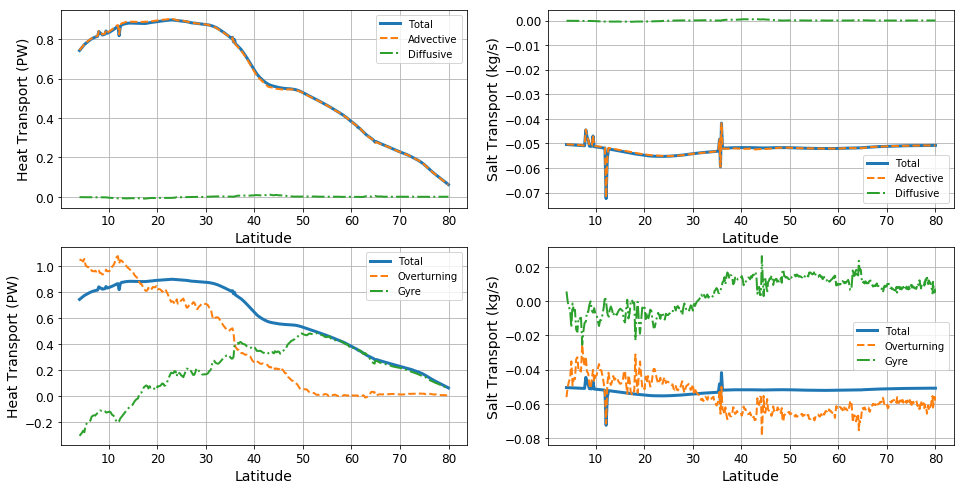

In [45]:
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[16,8])

ax = fig.add_subplot(grid[0, 0])
ax.plot(ds.nav_lat.isel(x=0), ds['hfbasin_atlantic'].mean(['x', 'time_counter', 'r']), lw = 3.0)
ax.plot(ds.nav_lat.isel(x=0), ds['sophtadv_atlantic'].mean(['x', 'time_counter', 'r']), ls = '--', lw = 2.0)
ax.plot(ds.nav_lat.isel(x=0), ds['hfbasinpmdiff_atlantic'].mean(['x', 'time_counter', 'r']), ls = '-.', lw = 2.0)
ax.set_ylabel(r'Heat Transport (PW)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid()
ax.legend(['Total', 'Advective', 'Diffusive'])
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[1, 0])
ax.plot(ds.nav_lat.isel(x=0), ds['hfbasin_atlantic'].mean(['x', 'time_counter', 'r']), lw = 3.0)
ax.plot(ds.nav_lat.isel(x=0), ds['hfovovrt_atlantic'].mean(['x', 'time_counter', 'r']), ls = '--', lw = 2.0)
ax.plot(ds.nav_lat.isel(x=0), ds['hfovgyre_atlantic'].mean(['x', 'time_counter', 'r']), ls = '-.', lw = 2.0)
#ax.plot(ds.nav_lat.isel(x=0), (ds['hfovovrt_atlantic'] + ds['hfovgyre_atlantic']).mean(['x', 'time_counter', 'r']), ls = '-.', lw = 2.0)
ax.set_ylabel(r'Heat Transport (PW)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid()
ax.legend(['Total', 'Overturning', 'Gyre'])
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)


ax = fig.add_subplot(grid[0, 1])
ax.plot(ds.nav_lat.isel(x=0), ds['sltbasin_atlantic'].mean(['x', 'time_counter', 'r']), lw = 3.0)
ax.plot(ds.nav_lat.isel(x=0), 0.001*ds['sopstadv_atlantic'].mean(['x', 'time_counter', 'r']), ls = '--', lw = 2.0)
ax.plot(ds.nav_lat.isel(x=0), ds['sltbasinpmdiff_atlantic'].mean(['x', 'time_counter', 'r']), ls = '-.', lw = 2.0)
ax.set_ylabel(r'Salt Transport (kg/s)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid()
ax.legend(['Total', 'Advective', 'Diffusive'])
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[1, 1])
ax.plot(ds.nav_lat.isel(x=0), ds['sltbasin_atlantic'].mean(['x', 'time_counter', 'r']), lw = 3.0)
ax.plot(ds.nav_lat.isel(x=0), ds['sltovovrt_atlantic'].mean(['x', 'time_counter', 'r']), ls = '--', lw = 2.0)
ax.plot(ds.nav_lat.isel(x=0), ds['sltovgyre_atlantic'].mean(['x', 'time_counter', 'r']), ls = '-.', lw = 2.0)
#ax.plot(ds.nav_lat.isel(x=0), (ds['hfovovrt_atlantic'] + ds['hfovgyre_atlantic']).mean(['x', 'time_counter', 'r']), ls = '-.', lw = 2.0)
ax.set_ylabel(r'Salt Transport (kg/s)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid()
ax.legend(['Total', 'Overturning', 'Gyre'])
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

#plt.plot(ds.nav_lat.isel(x=0), ds[var_heat[1]].mean(['x', 'time_counter', 'r']).transpose('y', 'r'), lw = 0.5);

Text(0.5, 1.0, 'Overturning (Sv) at different Lats')

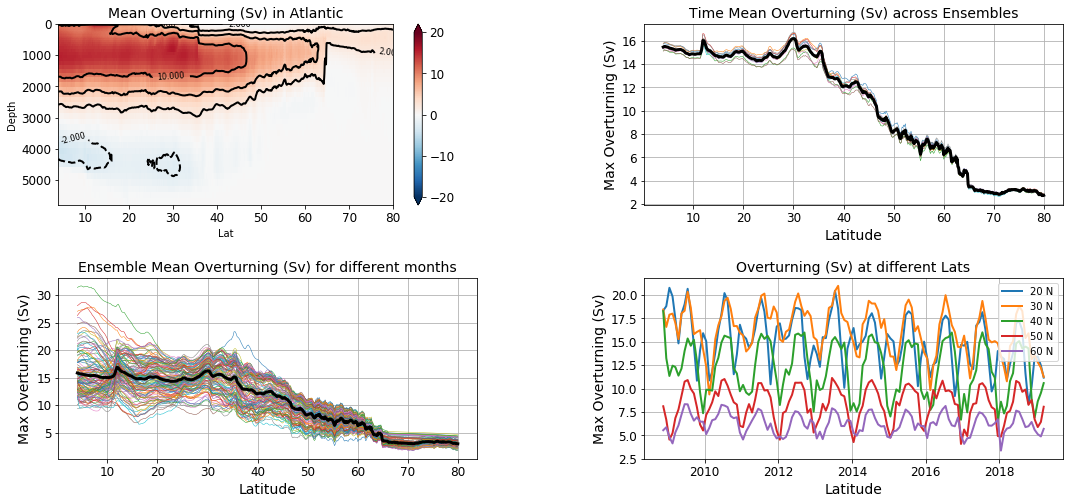

In [90]:
psi_lev = [-10, -5, -2, 2, 5, 10] 

grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.4)
fig = plt.figure(figsize=[18,8])

ax = fig.add_subplot(grid[0, 0])
p = ax.pcolor(ds.nav_lat.isel(x=0), ds.depthw, ds.zomsfatl.mean(['x', 'time_counter', 'r']), vmin=-20, vmax=20, cmap='RdBu_r')
cb = plt.colorbar(p, ax=ax, extend='both')
cb.ax.tick_params(labelsize=12)
contours = ax.contour(ds.nav_lat.isel(x=0), ds.depthw, ds.zomsfatl.mean(['x', 'time_counter', 'r']), psi_lev, colors='black', linewidths=2)
ax.clabel(contours, inline=True, fontsize=8)
ax.set_ylabel('Depth (m)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
plt.gca().invert_yaxis()
plt.title('Mean Overturning (Sv) in Atlantic', fontsize=14)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

psi_max = ds.zomsfatl.mean(['x', 'time_counter']).max(dim='depthw')
ax = fig.add_subplot(grid[0, 1])
ax.plot(ds.nav_lat.isel(x=0), psi_max.transpose('y', 'r'), lw = 0.5)
ax.plot(ds.nav_lat.isel(x=0), psi_max.mean(['r']), lw = 3.0, color='k')
ax.set_ylabel(r'Max Overturning (Sv)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.title('Time Mean Overturning (Sv) across Ensembles', fontsize=14)

psi_max = ds.zomsfatl.mean(['x', 'r']).max(dim='depthw')
ax = fig.add_subplot(grid[1, 0])
ax.plot(ds.nav_lat.isel(x=0), psi_max.transpose('y', 'time_counter'), lw = 0.5)
ax.plot(ds.nav_lat.isel(x=0), psi_max.mean(['time_counter']), lw = 3.0, color='k')
ax.set_ylabel(r'Max Overturning (Sv)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.title('Ensemble Mean Overturning (Sv) for different months', fontsize=14)


psi_max = ds.zomsfatl.mean(['x', 'r']).max(dim='depthw')
psi_max = psi_max.assign_coords(y=ds.nav_lat.isel(x=0))
psi_max = psi_max.sel(y=[20., 30., 40., 50., 60.], method="nearest")
ax = fig.add_subplot(grid[1, 1])
ax.plot(ds.time, psi_max.transpose('time_counter','y'), lw = 2.)
ax.set_ylabel(r'Max Overturning (Sv)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
ax.legend(['20 N', '30 N', '40 N', '50 N', '60 N'])
plt.title('Overturning (Sv) at different Lats', fontsize=14)

In [30]:
var_heat = ['hfbasin_atlantic', 'hfbasinpadv_atlantic', 'hfbasinpmadv_atlantic', 'hfbasinpmdiff_atlantic',
            'hfovbaro_atlantic', 'hfovgyre_atlantic', 'hfovovrt_atlantic', 'sophtadv_atlantic']

var_salt = ['sltbasin_atlantic', 'sltbasinpadv_atlantic', 'sltbasinpmadv_atlantic', 'sltbasinpmdiff_atlantic',
            'sltovbaro_atlantic', 'sltovgyre_atlantic', 'sltovovrt_atlantic', 'sopstadv_atlantic']

for var in var_heat:
    
    print(ds[var].standard_name)
          
for var in var_salt:
    
    print(ds[var].standard_name)

northward_ocean_heat_transport
heat_transport_due_to_parameterized_eddy_advection_atlantic
heat_transport_due_to_parameterized_mesoscale_eddy_advection_atlantic
northward_ocean_heat_transport_due_to_parameterized_mesoscale_diffusion_atlantic
barotropic_heat_transport_atlantic
gyre_heat_transport_atlantic
overturning_heat_transport_atlantic
advective_heat_transport_atlantic
northward_ocean_salt_transport_atlantic
salt_transport_due_to_parameterized_eddy_advection_atlantic
salt_transport_due_to_parameterized_mesoscale_eddy_advection_atlantic
northward_ocean_salt_transport_due_to_parameterized_mesoscale_diffusion_atlantic
barotropic_salt_transport_atlantic
gyre_salt_transport_atlantic
overturning_salt_transport_atlantic
advective_salt_transport_atlantic


In [32]:
len(var_heat)

8

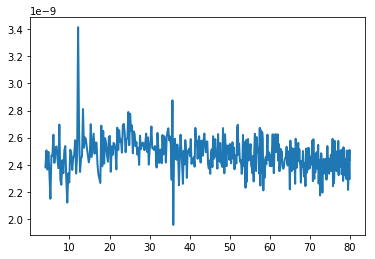

In [59]:
#plt.plot(ds.nav_lat.isel(x=0), ( ds['sopstadv_atlantic'] - ds['sltovbaro_atlantic']).mean(['x', 'time_counter', 'r']), ls = '--', lw = 2.0)
#plt.plot(ds.nav_lat.isel(x=0), ds['sltbasinpmdiff_atlantic'].mean(['x', 'time_counter', 'r']), ls = '-.', lw = 2.0)
plt.plot(ds.nav_lat.isel(x=0), (ds['sltbasin_atlantic'] - ds['sopstadv_atlantic']*0.001 - ds['sltbasinpmdiff_atlantic']).mean(['x', 'time_counter', 'r']), ls = '-', lw = 2.0)

## Ocean Data - Surface 2D Fields

In [20]:
# Code for combining data

ppdir="/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppA-hindcast/"

year = 2008
var_list = ['volo', 'hfds', 'mlotst', 'tos', 'sos', 'zos']

ds = []

for i in range(0,10):
    
    ds1 = []
    
    for var in var_list:
        
        var_path = "s" + str(year) +"-r" + str(i+1) + "i1p1f2/Omon/" + var + "/gn/files/d20200417/"
    
        d = xr.open_mfdataset(ppdir + var_path + "*.nc")
        
        ds1.append(d)
        
    ds1 = xr.merge(ds1)
    
    ds.append(ds1)
    
ds = xr.concat(ds, dim='r')

ds = ds.drop(['vertices_latitude', 'vertices_longitude'])
ds = ds.isel(i=slice(749,1199), j = slice(699, 1149))

#save_path="/home/users/hkhatri/DePreSys4_Data/Ensemble_Data/Data_Consolidated/"
#save_file = save_path + "2008_diaptr.nc"
#ds_save = ds.load()
#ds_save.to_netcdf(save_file)

print(ds)

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 1440, j: 1205, r: 1, time: 125, vertices: 4)
Coordinates:
  * time                (time) object 2008-11-16 00:00:00 ... 2019-03-16 00:00:00
  * j                   (j) int32 0 1 2 3 4 5 ... 1199 1200 1201 1202 1203 1204
  * i                   (i) int32 0 1 2 3 4 5 ... 1434 1435 1436 1437 1438 1439
    latitude            (j, i) float32 -89.4875 -89.4875 ... 50.019047 50.0
    longitude           (j, i) float32 73.0 73.25 73.5 73.75 ... 73.0 73.0 73.0
Dimensions without coordinates: bnds, r, vertices
Data variables:
    time_bnds           (r, time, bnds) float64 dask.array<shape=(1, 125, 2), chunksize=(1, 2, 2)>
    volo                (r, time) float32 dask.array<shape=(1, 125), chunksize=(1, 2)>
    vertices_latitude   (r, time, j, i, vertices) float32 dask.array<shape=(1, 125, 1205, 1440, 4), chunksize=(1, 2, 1205, 1440, 4)>
    vertices_longitude  (r, time, j, i, vertices) float32 dask.array<shape=(1, 125, 1205, 1440, 4), chunk

In [34]:
#ds = ds.drop(['vertices_latitude', 'vertices_longitude'])

ds1 = ds.isel(i=slice(749,1199), j = slice(699, 1149))

print(ds1)

<xarray.Dataset>
Dimensions:    (bnds: 2, i: 450, j: 450, r: 1, time: 125)
Coordinates:
  * time       (time) object 2008-11-16 00:00:00 ... 2019-03-16 00:00:00
  * j          (j) int32 699 700 701 702 703 704 ... 1144 1145 1146 1147 1148
  * i          (i) int32 749 750 751 752 753 754 ... 1194 1195 1196 1197 1198
    latitude   (j, i) float32 3.9967546 3.9967546 3.9967546 ... 73.3409 73.23673
    longitude  (j, i) float32 -99.75 -99.5 -99.25 ... 51.24366 51.40632
Dimensions without coordinates: bnds, r
Data variables:
    time_bnds  (r, time, bnds) float64 dask.array<shape=(1, 125, 2), chunksize=(1, 2, 2)>
    volo       (r, time) float32 dask.array<shape=(1, 125), chunksize=(1, 2)>
    hfds       (r, time, j, i) float32 dask.array<shape=(1, 125, 450, 450), chunksize=(1, 2, 450, 450)>
    mlotst     (r, time, j, i) float32 dask.array<shape=(1, 125, 450, 450), chunksize=(1, 2, 450, 450)>
    tos        (r, time, j, i) float32 dask.array<shape=(1, 125, 450, 450), chunksize=(1, 2, 450, 

In [35]:
print(ds1.latitude, ds1.longitude)

<xarray.DataArray 'latitude' (j: 450, i: 450)>
array([[ 3.996755,  3.996755,  3.996755, ...,  3.996755,  3.996755,  3.996755],
       [ 4.246108,  4.246108,  4.246108, ...,  4.246108,  4.246108,  4.246108],
       [ 4.495381,  4.495381,  4.495381, ...,  4.495381,  4.495381,  4.495381],
       ...,
       [64.21774 , 64.23563 , 64.25423 , ..., 73.34649 , 73.243   , 73.139404],
       [64.25269 , 64.27034 , 64.28872 , ..., 73.39617 , 73.29238 , 73.1885  ],
       [64.28731 , 64.304726, 64.32287 , ..., 73.44498 , 73.3409  , 73.23673 ]],
      dtype=float32)
Coordinates:
  * j          (j) int32 699 700 701 702 703 704 ... 1144 1145 1146 1147 1148
  * i          (i) int32 749 750 751 752 753 754 ... 1194 1195 1196 1197 1198
    latitude   (j, i) float32 3.9967546 3.9967546 3.9967546 ... 73.3409 73.23673
    longitude  (j, i) float32 -99.75 -99.5 -99.25 ... 51.24366 51.40632
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    bounds:  

In [17]:
ppdir="/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppA-hindcast/"

year = 2008
var_list = ['volo', 'hfds', 'mlotst', 'tos', 'sos', 'zos']

for i in range(0,1):
    
    ds1 = []
    
    for var in var_list:
        
        var_path = "s" + str(year) +"-r" + str(i+1) + "i1p1f2/Omon/" + var + "/gn/files/d20200417/"
    
        d = xr.open_mfdataset(ppdir + var_path + "*.nc")
        
        ds1.append(d)
        
    ds1 = xr.merge(ds1)

print(ds1)

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 1440, j: 1205, time: 125, vertices: 4)
Coordinates:
  * time                (time) object 2008-11-16 00:00:00 ... 2019-03-16 00:00:00
  * j                   (j) int32 0 1 2 3 4 5 ... 1199 1200 1201 1202 1203 1204
  * i                   (i) int32 0 1 2 3 4 5 ... 1434 1435 1436 1437 1438 1439
    latitude            (j, i) float32 -89.4875 -89.4875 ... 50.019047 50.0
    longitude           (j, i) float32 73.0 73.25 73.5 73.75 ... 73.0 73.0 73.0
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) float64 dask.array<shape=(125, 2), chunksize=(2, 2)>
    volo                (time) float32 dask.array<shape=(125,), chunksize=(2,)>
    vertices_latitude   (time, j, i, vertices) float32 dask.array<shape=(125, 1205, 1440, 4), chunksize=(2, 1205, 1440, 4)>
    vertices_longitude  (time, j, i, vertices) float32 dask.array<shape=(125, 1205, 1440, 4), chunksize=(2, 1205, 1440, 4)>
    hfds       

In [24]:
ds.nbytes/1e9

4.35189568

In [3]:
ppdir="/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppA-hindcast/"

var="s2008-r1i1p1f2/Omon/uo/gn/files/d20200417/"

d = xr.open_mfdataset(ppdir + var + "*.nc")

print(d)

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 1440, j: 1205, lev: 75, time: 125, vertices: 4)
Coordinates:
  * lev                 (lev) float64 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * j                   (j) int32 0 1 2 3 4 5 ... 1199 1200 1201 1202 1203 1204
  * i                   (i) int32 0 1 2 3 4 5 ... 1434 1435 1436 1437 1438 1439
    latitude            (j, i) float32 -89.484375 -89.484375 ... 49.99881
    longitude           (j, i) float32 73.125 73.375 73.625 ... 73.0 73.0 73.0
  * time                (time) object 2008-11-16 00:00:00 ... 2019-03-16 00:00:00
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) float64 dask.array<shape=(125, 2), chunksize=(2, 2)>
    lev_bnds            (time, lev, bnds) float64 dask.array<shape=(125, 75, 2), chunksize=(2, 75, 2)>
    vertices_latitude   (time, j, i, vertices) float32 dask.array<shape=(125, 1205, 1440, 4), chunksize=(2, 1205, 1440, 4)>
    vertices_longitude  (time

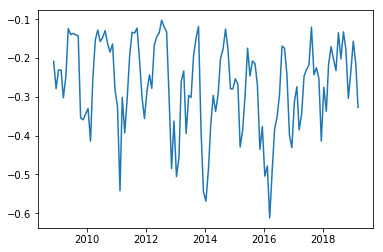

In [11]:
plt.plot(d['time'].astype("datetime64[ns]"), d.uo.isel(lev=0,j=1000,i=1000))

## Atmospheric Data

In [ ]:
ppdir="/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppA-hindcast/"

year = 2008
var_list = ['volo', 'hfds', 'mlotst', 'tos', 'sos', 'zos']

ds = []

for i in range(0,10):
    
    ds1 = []
    
    for var in var_list:
        
        var_path = "s" + str(year) +"-r" + str(i+1) + "i1p1f2/Omon/" + var + "/gn/files/d20200417/"
    
        d = xr.open_mfdataset(ppdir + var_path + "*.nc")
        
        ds1.append(d)
        
    ds1 = xr.merge(ds1)
    
    ds.append(ds1)
    
ds = xr.concat(ds, dim='r')

In [36]:
ppdir="/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppA-hindcast/"

var="s2008-r1i1p1f2/Amon/tauu/gn/files/d20200417/"

d = xr.open_mfdataset(ppdir + var + "*.nc")

print(d)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 324, lon: 432, time: 125)
Coordinates:
  * lat        (lat) float64 -89.72 -89.17 -88.61 -88.06 ... 88.61 89.17 89.72
  * lon        (lon) float64 0.0 0.8333 1.667 2.5 ... 356.7 357.5 358.3 359.2
  * time       (time) object 2008-11-16 00:00:00 ... 2019-03-16 00:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 dask.array<shape=(125, 2), chunksize=(2, 2)>
    lat_bnds   (time, lat, bnds) float64 dask.array<shape=(125, 324, 2), chunksize=(2, 324, 2)>
    lon_bnds   (time, lon, bnds) float64 dask.array<shape=(125, 432, 2), chunksize=(2, 432, 2)>
    tauu       (time, lat, lon) float32 dask.array<shape=(125, 324, 432), chunksize=(2, 324, 432)>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            DCPP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2020-11-11T14:12:43Z
    cv_version:    

In [37]:
ppdir="/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppA-hindcast/"

var="s2008-r1i1p1f2/Amon/tauv/gn/files/d20200417/"

d = xr.open_mfdataset(ppdir + var + "*.nc")

print(d)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 325, lon: 432, time: 125)
Coordinates:
  * lat        (lat) float64 -90.0 -89.44 -88.89 -88.33 ... 88.89 89.44 90.0
  * lon        (lon) float64 0.4167 1.25 2.083 2.917 ... 357.1 357.9 358.7 359.6
  * time       (time) object 2008-11-16 00:00:00 ... 2019-03-16 00:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 dask.array<shape=(125, 2), chunksize=(2, 2)>
    lat_bnds   (time, lat, bnds) float64 dask.array<shape=(125, 325, 2), chunksize=(2, 325, 2)>
    lon_bnds   (time, lon, bnds) float64 dask.array<shape=(125, 432, 2), chunksize=(2, 432, 2)>
    tauv       (time, lat, lon) float32 dask.array<shape=(125, 325, 432), chunksize=(2, 325, 432)>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            DCPP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2020-11-11T14:12:43Z
    cv_version:   

In [41]:
ppdir="/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppA-hindcast/"

var="s2008-r1i1p1f2/Amon/psl/gn/files/d20200417/"

d = xr.open_mfdataset(ppdir + var + "*.nc")

var="s2008-r1i1p1f2/Amon/ps/gn/files/d20200417/"

d1 = xr.open_mfdataset(ppdir + var + "*.nc")

print(d)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 324, lon: 432, time: 125)
Coordinates:
  * lat        (lat) float64 -89.72 -89.17 -88.61 -88.06 ... 88.61 89.17 89.72
  * lon        (lon) float64 0.4167 1.25 2.083 2.917 ... 357.1 357.9 358.7 359.6
  * time       (time) object 2008-11-16 00:00:00 ... 2019-03-16 00:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 dask.array<shape=(125, 2), chunksize=(2, 2)>
    lat_bnds   (time, lat, bnds) float64 dask.array<shape=(125, 324, 2), chunksize=(2, 324, 2)>
    lon_bnds   (time, lon, bnds) float64 dask.array<shape=(125, 432, 2), chunksize=(2, 432, 2)>
    psl        (time, lat, lon) float32 dask.array<shape=(125, 324, 432), chunksize=(2, 324, 432)>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            DCPP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2020-05-28T15:22:06Z
    cv_version: 

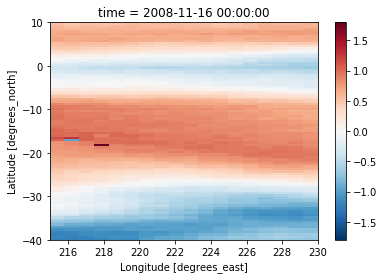

In [46]:
(d.psl.isel(time=0) - d1.ps.isel(time=0)).sel(lat=slice(-40, 10), lon=slice(215,230)).plot()